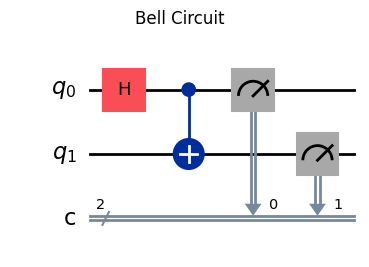

In [12]:
from qiskit import QuantumCircuit
import matplotlib.pyplot as plt

qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])
fig = qc.draw("mpl")
fig.suptitle("Bell Circuit")
plt.show()


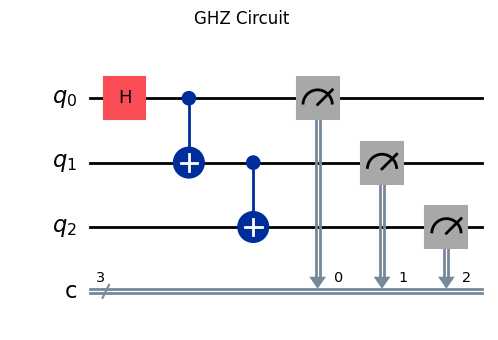

In [13]:
from qiskit import QuantumCircuit
import matplotlib.pyplot as plt

qc = QuantumCircuit(3, 3)
qc.h(0)
qc.cx(0, 1)
qc.cx(1,2)
qc.measure([0, 1, 2], [0, 1, 2])
fig = qc.draw("mpl")
fig.suptitle("GHZ Circuit")
plt.show()

Visualizing Bell State Circuit...
PRINT: c0, c1


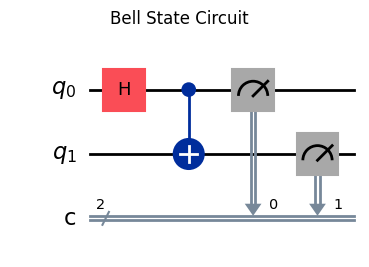

Visualizing GHZ State Circuit...


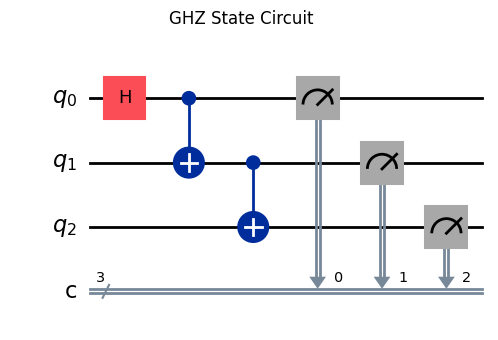

In [2]:
%matplotlib inline
import json
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit

def visualize_circuit(ir, title):
    qubits = ir["qubits"]
    instructions = ir["instructions"]

    num_qubits = len(qubits)
    classical_bits = set()
    for instr in instructions:
        if instr["op"] == "measure":
            classical_bits.update(instr.get("classical", []))
    classical_bits = sorted(classical_bits)
    
    qc = QuantumCircuit(num_qubits, len(classical_bits))
    qmap = {q: i for i, q in enumerate(qubits)}
    cmap = {c: i for i, c in enumerate(classical_bits)}

    for instr in instructions:
        op = instr["op"]
        if op == "h":
            qc.h(qmap[instr["args"][0]])
        elif op == "cx":
            qc.cx(qmap[instr["args"][0]], qmap[instr["args"][1]])
        elif op == "measure":
            for q, c in zip(instr["qubits"], instr["classical"]):
                qc.measure(qmap[q], cmap[c])
        elif op == "print":
            print("PRINT:", ", ".join(instr["args"]))

    fig = qc.draw("mpl")
    fig.suptitle(title)
    plt.show()

def main():
    with open("bell_ir.json") as f:
        bell_ir = json.load(f)
    with open("ghz_ir.json") as f:
        ghz_ir = json.load(f)

    print("Visualizing Bell State Circuit...")
    visualize_circuit(bell_ir, "Bell State Circuit")

    print("Visualizing GHZ State Circuit...")
    visualize_circuit(ghz_ir, "GHZ State Circuit")

if __name__ == "__main__":
    main()

